# New York Airbnb analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Overview of data

In [6]:
# Reading the CSV-file and naming the dataset 'data'
data = pd.read_csv('AB_NYC_2019.csv')

In [7]:
# Size of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Interpretation:** The dataset has 16 rows and 48895 columns

In [9]:
# Overview of the dataset
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Cleaning the dataset

In [11]:
# Deleting unnessecary columns
data.drop(columns = ['host_name', 'latitude', 'longitude', 'last_review'], inplace = True)

# Ovierview on the smaller dataset
data.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


**Information:** The deleted columns had no value for the analysis and just made the dataset more chaotic

In [13]:
# Number of accomodations with 0 reviews
print(f"Number of accomodations with 0 reviews: {(data['number_of_reviews'] == 0).sum()}")

# Amount of missing values
print(f"\nAmount of missing values (NaN): \n{data.isna().sum()}")

Number of accomodations with 0 reviews: 10052

Amount of missing values (NaN): 
id                                    0
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


**Interpretation:** There almost no missing values, as the 10052 can not be counted as real missing values. The reason for this is that thos apartments all have 0 reviews in general and as a result, the column 'number_of_reviews' got filled with 'NaN' instead of 0. There are 16 missing values in the column 'name'. Hovewer, this can be ignored, as that column has no relevance in this analysis and it is a very small number.

In [15]:
# Filling the zero-values of the column 'reviews_per_month' with 0
data.fillna({'reviews_per_month': 0}, inplace = True)

**Information:** The 16 zero values in the name column will just be left like they are, as it does not really matter.  
**Interpretation:** Here the 10052 missing values in the column 'reviews_per_month' just got replaced with the number 0 to make the data set more clean.

## Analysis & Visualisation

### Mean price of an Airbnb per main district

Price per district: 
neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


<Axes: xlabel='neighbourhood_group', ylabel='price'>

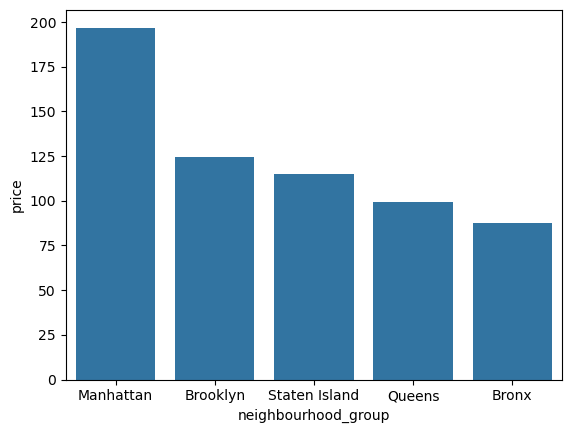

In [47]:
# Mean price of the arpartments of main districts
price_per_district = data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(f"Price per district: \n{price_per_district}")

# Barplot
sns.barplot(data=price_per_district)

**Interpretation:** Manhattan is by far the most expensive area in New York City. Bronx ist the cheapest

### Listings per main district

listings per district: 
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


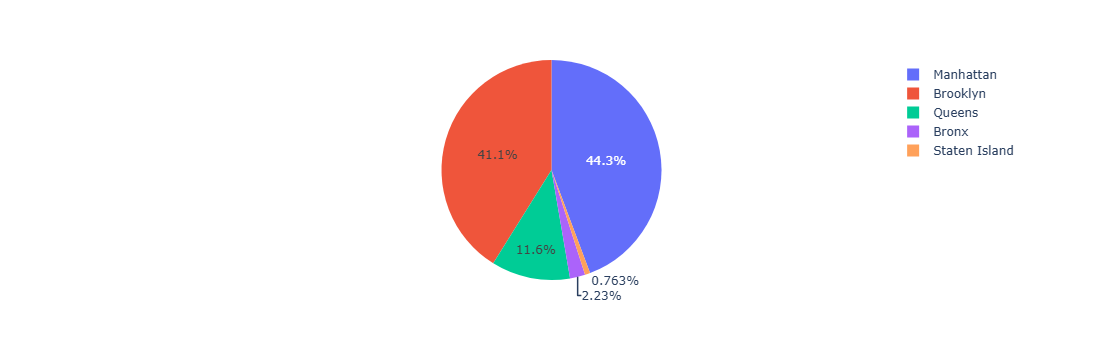

In [49]:
# Number of listings in each main district
listings_per_district = data['neighbourhood_group'].value_counts(ascending=False)
print(f"listings per district: \n{listings_per_district}")

# Interactive piechart
px.pie(data_frame=listings_per_district, values='count', names=listings_per_district.index)

**Interpretation:** The number of listings is highest in Manhattan and Brooklyn. Together, they dominate the market with more than 80% of total listings.

### Reviews per main district


In [25]:
# Sum of reviews in each main district
reviews_per_district = data.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)

# Interactive barplot
px.bar(data_frame = reviews_per_district,y='number_of_reviews')

**Interpretation:** Reviews are distributed across the main districts in almost the same way as listings.

### Correlation between the price of an airbnb and its number of reviews


<Axes: xlabel='price', ylabel='number_of_reviews'>

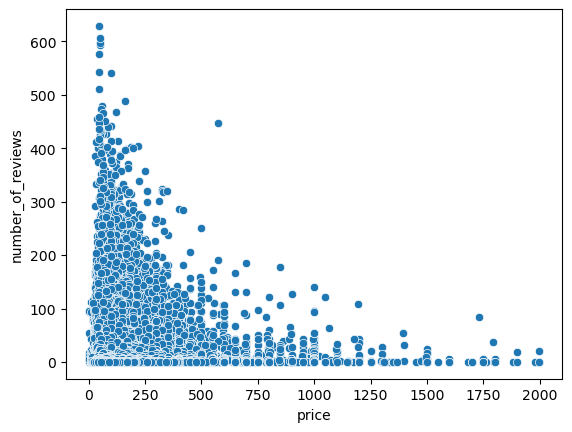

In [28]:
# Filtering out rooms with prices above 2000$
data_scatterplot = data[data['price']<2000]

# Scatterplot
sns.scatterplot(data=data_scatterplot, x='price', y='number_of_reviews')

**Information:** Unrealistic prices above 2000$ per night were filtered out of the plot to improve clarity.  
**Interpretation:** The number of reviews tends to increase as the price decreases. Very expensive accommodations generally receive significantly fewer reviews.

### Price per roomtype

<Axes: ylabel='price'>

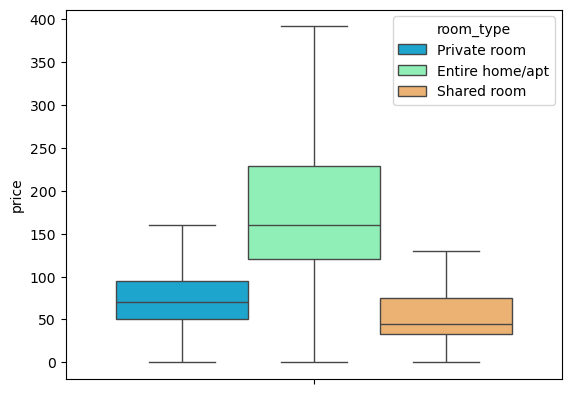

In [31]:
# Boxplot of the price per roomtype
sns.boxplot(data, y='price', hue='room_type', showfliers = False, palette='rainbow')

**Information:** Very expensive outliers were removed to improve clarity.  
**Interpretation:** Entire homes/apartments are the most expensive and show the widest price range. Private rooms are cheaper, but still significantly more expensive than shared rooms. The price gap between private and shared rooms is much smaller than the gap between those two and entire homes/apartments.

## Conclusion

This short analysis of New York City Airbnb data shows clear trends in price, listing distribution, and review patterns. Most listings are concentrated in Manhattan and Brooklyn, which also have the highest number of reviews and above-average prices, indicating that these two districts are by far the most popular areas. Entire homes/apartments are significantly more expensive than private or shared rooms. Furthermore, cheaper listings tend to receive more reviews, possibly due to higher demand. Overall, the data reflects how location and room type strongly influence both price and popularity.